In [7]:
import seaborn as sns
df = sns.load_dataset('Dataset/titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(df.isnull().sum())  # Count missing values per column

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

In [12]:
print(df.isnull().sum())  # Count missing values per column

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
print(df['sex'].unique())


['male' 'female']


In [15]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else (0 if x == 'female' else x))


In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
# 2. One-hot encode 'embarked' column, drop first to avoid dummy trap
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

NameError: name 'pd' is not defined

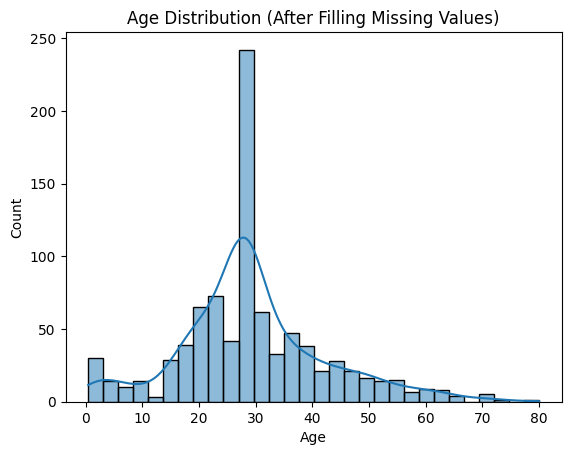

In [ ]:
# 3. Visualize Age distribution after filling missing values
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution (After Filling Missing Values)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


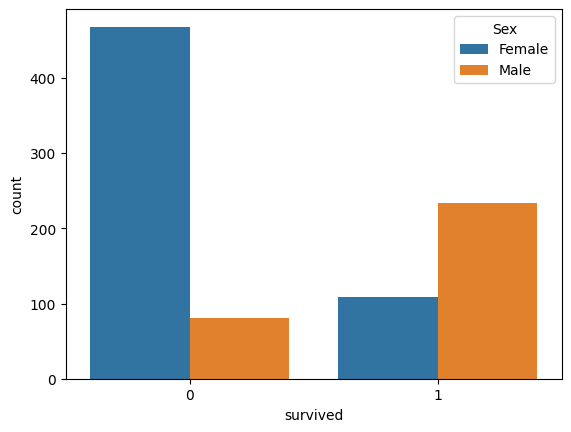

In [63]:
sns.countplot(x='survived', hue=df['sex_male'].astype(str), data=df)
plt.legend(title='Sex', labels=['Female', 'Male'])

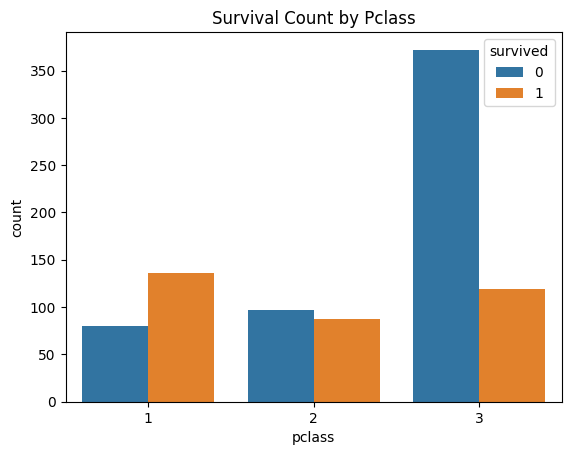

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset('Dataset/titanic')

# Plot survival by class
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival Count by Pclass")
plt.show()


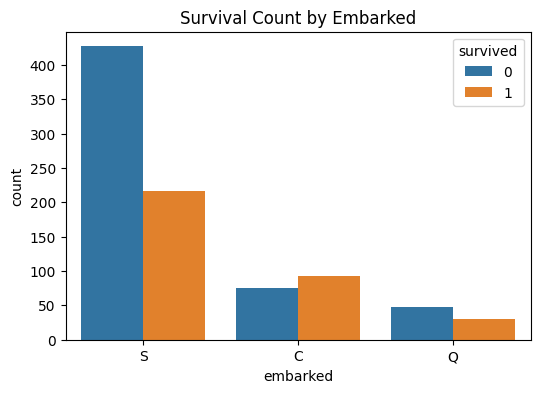

In [31]:
# 2. Survival count by Embarked
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='embarked', hue='survived')
plt.title("Survival Count by Embarked")
plt.show()

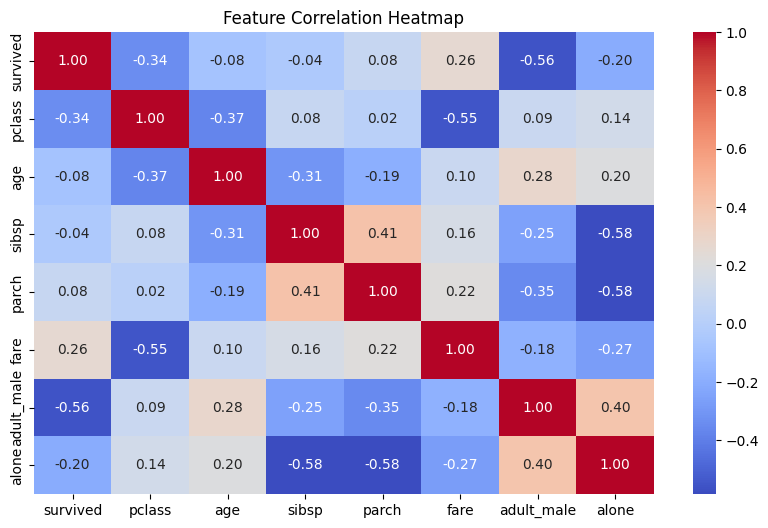

In [32]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

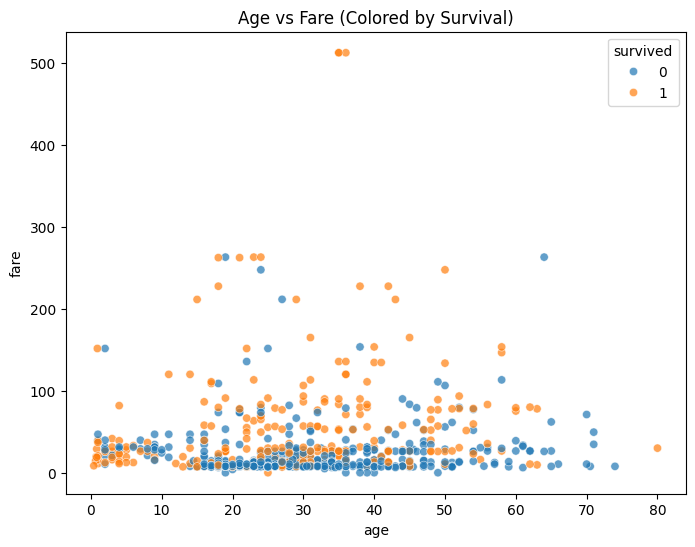

In [36]:
# 4. Age vs Fare scatterplot colored by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='survived', alpha=0.7)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

In [39]:
df['familysize'] = df['sibsp'] + df['parch'] + 1


In [50]:
df['agebin'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], 
                      labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

In [56]:
df['farebin'] = pd.qcut(df['fare'], 4, 
                        labels=["Low", "Mid", "High", "VeryHigh"])

In [ ]:
# Drop redundant/derivable columns: alive, class, who, adult_male, alone
df.drop(['alive', 'class', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
# ⚠️ Note: These columns may have already been deleted earlier in the workflow.
# If they are missing, this will raise a KeyError. Uncomment the line below only if the columns still exist.

KeyError: "['alive', 'class', 'who', 'adult_male', 'alone'] not found in axis"